### Linear Regression from Scratch
The goal of this project is to practice creating a linear regression model.  
For this practice project, I am going predict house prices using the Ames dataset: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset  
I will be creating a linear regression model from scratch, so I will not be using libraties like Tensorflow or PyTorch.  
However, I'll be using pandas and numpy, because they make vector calculations quicker, and matplotlib for visualization.  
I will be using the material that I learned from the Coursera course 'Machine Learning Specialization': https://www.coursera.org/specializations/machine-learning-introduction  
And from this Standford lecture video that I found on YouTube: https://www.youtube.com/watch?v=gqKaVgQxEJ0  

### Taking a look at the columns ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Let's load the data into an inidial pandas dataframa
df = pd.read_csv('AmesHousing.csv')

# And then take a look at the initial rows.
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


The dataset has 82 columns, but a lot of which I do not know what they mean. So it looks like we can't use all of them as parameters.

In [97]:
# I'm going to print all the columns to see which ones I might want to drop.
all_columns = df.columns.tolist()
for column in all_columns:
    print(column)
    print(df[column].unique())
    print(df[column].describe())
    print(' ')

Order
[   1    2    3 ... 2928 2929 2930]
count    2930.00000
mean     1465.50000
std       845.96247
min         1.00000
25%       733.25000
50%      1465.50000
75%      2197.75000
max      2930.00000
Name: Order, dtype: float64
 
PID
[526301100 526350040 526351010 ... 923400125 924100070 924151050]
count    2.930000e+03
mean     7.144645e+08
std      1.887308e+08
min      5.263011e+08
25%      5.284770e+08
50%      5.354536e+08
75%      9.071811e+08
max      1.007100e+09
Name: PID, dtype: float64
 
MS SubClass
[ 20  60 120  50  85 160  80  30  90 190  45  70  75  40 180 150]
count    2930.000000
mean       57.387372
std        42.638025
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MS SubClass, dtype: float64
 
MS Zoning
['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
count     2930
unique       7
top         RL
freq      2273
Name: MS Zoning, dtype: object
 
Lot Frontage
[141.  80.  81.  93.  74.  78.  41.  43.  39

A lot of these columns are not very useful, but let's go over them one by one.  
Ideally you would do this with someone that knows more about the subject, but since this project is just for practice, I'm going to just pick what feels right.  
  
Order = Just seems to be a number to order the data. Drop it.  
PID = Just a house ID number. Drop it.  
MS SubClass = I have no idea. Drop it.  
MS Zoning = Seems to be related to zoning laws. I might try to one-hot encode this.  
Lot Frontage = Looks like this measures how wide the lot is where it is facing the street. Sounds useful.  
Lot Area = Lot area speaks for itself. Definitely useful.  
Street = Pavement or Gravel, with onlt 12 of them being Gravel. That does not give a lot of info, so I might as well drop it.  
Alley = Alley or no, and what kind of alley. 2700+ have no alley, so this does not give a lot of info. Dropping it.  
Lot Shape = Regular shape, and 3 types or irregular shapes? About 60% is regular, so again, not a lot of information. Drop it.  
Land Contour = Level, Hillside, Bank, or low? Most of it is level, but I could see how a hillside might inflict a penalty. Might one-hot encode this.  
Utilities = Only 3 out of 2930 have something besides AllPub. Looks useless. Dropping it.  
Lot Config = Might be useful. Corner and Cul de sac lots are likely worth more than interior lots? Might one-hot encode this.  
Land Slope = I do not know what 'Gtl' 'Mod' 'Sev' mean. I am dropping this.  
Neighborhood = Neighborhood can definitely impact price. I am one-hot encoding this. Prepare for loads of extra columns.  
Condition 1 & Condition 2 = I don't know what this means, so I am drooping this.  
Bldg Type = Building type. Probably useful. One-hot encode.  
House Style = Same as above. One-hot encode.  
Overall Qual & Overall Cond = Quality and condition would influence the house price. Keeping it.  
Year Built = House age influences price. Keeping it.  
Year Remod/Add = Remodelled houses fetch better prices. Keeping it.  
Roof Style & Roof Matl = The roof has a big influence on the look of a house, so I am one-hot encoding this.  
Exterior 1st & Exterior 2nd = Same as above. Looks matter. One-hot encode.  
Mas Vnr Type = More than half is NaN, so I am dropping this.  
Mas Vnr Area = Not sure what this is, but it is weird that there are so many values, despite the previous one having so little. From the name they seem related, but the data says otherwise? Dropping this  
Exter Qual & Exter Cond = The values mean Poor, Fair, Average, Good and Excelent. I can ordinal encode this.  
Foundation = I think this would influence the price, so I am one-hot encoding it.  
Bsmt Qual & Bsmt Cond = The values mean Poor, Fair, Average, Good and Excelent. I can ordinal encode this.  
Bsmt Exposure & BsmtFin Type 1 & BsmtFin Type 2 = I don't know what the values mean. Dropping these.  
BsmtFin SF & BsmtFin SF 2 & Bsmt Unf SF = Basement square footage? Sounds useful. Keeping it.  
Total Bsmt SF = Not sure whether this is useful if I have the above values already. Dropping it.  
Heating = 2885 of 2930 are the same. Dropping it.  
Heating QC = I don't know what the vlaues mean. Dropping it.  
Central Air = Yes or No, so I'll just turn this into 1 or 0  
Electrical = I doubt this makes a big difference in the house price. Dropping it.  
1st Flr SF & 2nd Flr SF & Low Qual Fin SF & Gr Liv Area = Various square footage values. Keeping it.  
Bsmt Full Bath & Bsmt Half Bath & Full Bath & Half Bath = No idea what this is. Dropping it.  
Bedroom AbvGr = Number of bedrooms. Keeping it.  
Kitchen AbvGr = Number of kitchens. Keeping it.  
Kitchen Qual = The values mean Poor, Fair, Average, Good and Excelent. I can ordinal encode this.  
TotRms AbvGrd = Total rooms above ground. Useful. Keeping it.  
Functional = I don't know what the values mean. Dropping this.  
Fireplaces = More fireplaces ususally means more expensive, right? Keeping this.  
Fireplace Qu = Fireplace quality. I am going to ordinal encode this.  
Garage Type & Garage Finish = More than half is one type, and I am not sure whether garage type would matter much. Dropping it.  
Garage Yr Blt & Garage Cars & Garage Area = Since the values are numbers, I might as well add this.  
Garage Qual & Garage Cond = The values mean Poor, Fair, Average, Good and Excelent. I can ordinal encode this.  
Paved Drive = Most of it is one value. Dropping this.  
Wood Deck SF = Wood Decks are fancy. Bigger means more money. Keeping it.  
Open Porch SF & Enclosed Porch & 3Ssn Porch & Screen Porch = Same as the wood deck.  
Pool Area & Pool QC = More than 90% of houses do not have a pool. But a pool would definitely add to the price. Lets add it.  
Fence & Misc Feature & Misc Val = The values don't mean anything to me. Dropping it.  
Mo Sold & Yr Sold = Prices fluctuate depending on when they are sold. I am going to feature engineer this like this: Yr Sold * 12 + Mo Sold. That way I get the sale month instead of the sale year.  
Sale Type & Sale Condition = The values don't mean anything to me. Dropping it.  
SalePrice = This is our Y

In [2]:
# I am making a list of columns that I want to drop, a list of columns that I want to one-hot encode, and one for columns I want to ordinal encode.

# First the drop list
drop_list = ['Order','PID','MS SubClass','Street','Alley','Lot Shape','Utilities','Land Slope','Condition 1','Condition 2','Mas Vnr Type','Mas Vnr Area','Bsmt Exposure',
             'BsmtFin Type 1','BsmtFin Type 2','Total Bsmt SF','Heating','Heating QC','Electrical','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Functional',
             'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature', 'Misc Val', 'Sale Type', 'Sale Condition','SalePrice']

# This is a list of columns with useful values that I want to one-hot encode
one_hot_encode_list = ['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation','Central Air']

# This is a list of columns with  useful values that I want to ordinal encode
ordinal_encode_list = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond','Pool QC']

# This is a list of columns with  useful values that that have numbers
keep_list = ['Lot Frontage','Lot Area','Overall Qual', 'Overall Cond','Year Built','Year Remod/Add','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Bedroom AbvGr','Kitchen AbvGr','Kitchen Qual',
             'TotRms AbvGrd','Fireplaces','Garage Yr Blt', 'Garage Cars', 'Garage Area','Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area']

# This is the y, which I want to predict
y_label = 'SalePrice'

In [3]:
# We can just drop the columns that we don't want.
df2 = df.drop(columns=drop_list)

# I want to ordinal encode before I visualize the data, because I can't visualize these columns without them being number first.
quality_ratings = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical or Average
    'Fa': 2,  # Fair
    'Po': 1,   # Poor
}

# Iterates over all the column values and replaces the quality string with an integer corresponding to what is in the quality_ratings dictionary
for column in ordinal_encode_list:
    for row in range(df2.shape[0]):
        if df2.loc[row, column] in quality_ratings.keys():
            quality = df2.loc[row, column]
            df2.loc[row, column] = quality_ratings[quality]

# The keep_list & ordinal_encode_list are now both usable numerical data that we can visualize, so lets combine them.
numerical_columns = keep_list + ordinal_encode_list

# Changes any NaN values to 0 for both 
for column in numerical_columns:
    df2[column] = df2[column].fillna(0)

# Just checking whether all the values are numbers now.
for column in numerical_columns:
    print(column)
    print(df2[column].unique())
    print(' ')

# Looks like everything is numbers now! Great!

Lot Frontage
[141.  80.  81.  93.  74.  78.  41.  43.  39.  60.  75.   0.  63.  85.
  47. 152.  88. 140. 105.  65.  70.  26.  21.  53.  24. 102.  98.  83.
  94.  95.  90.  79. 100.  44. 110.  61.  36.  67. 108.  59.  92.  58.
  56.  73.  72.  84.  76.  50.  55.  68. 107.  25.  30.  57.  40.  77.
 120. 137.  87. 119.  64.  96.  71.  69.  52.  51.  54.  86. 124.  82.
  38.  48.  89.  66.  45.  35. 129.  31.  42.  28.  99. 104.  97. 103.
  34. 117. 149. 122.  62. 174. 106. 112.  32. 115. 128.  91.  33. 121.
 144. 130. 109. 150. 113. 125. 101.  46. 114. 135. 136.  37.  22. 313.
  49. 123. 160. 195. 118. 134. 182. 116. 138. 155. 126. 200. 168. 111.
 131. 153. 133.]
 
Lot Area
[31770 11622 14267 ...  7937  8885 10441]
 
Overall Qual
[ 6  5  7  8  9  4  3  2 10  1]
 
Overall Cond
[5 6 7 2 8 4 9 3 1]
 
Year Built
[1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 1993 1990 1985 2003
 1988 2010 1951 1978 1977 1974 2000 1970 1971 1975 2009 2007 2005 2004
 2002 2006 1996 1994 2008 1980 1979 1984 

### Visualize data ###

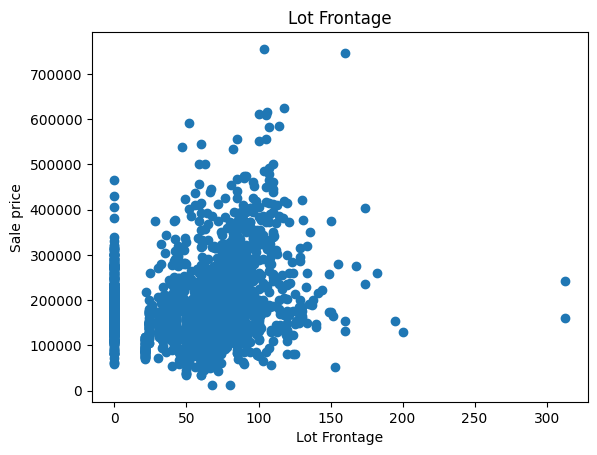

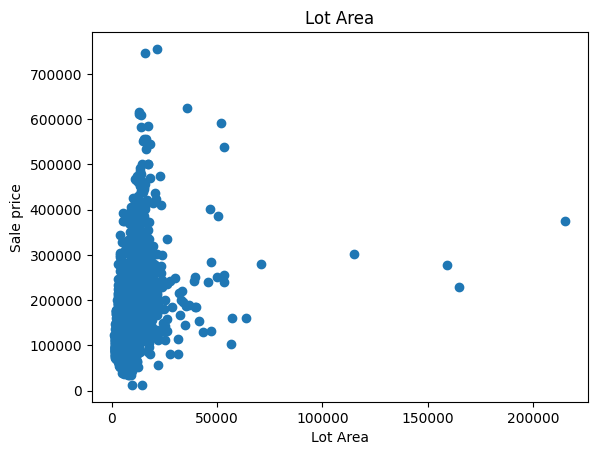

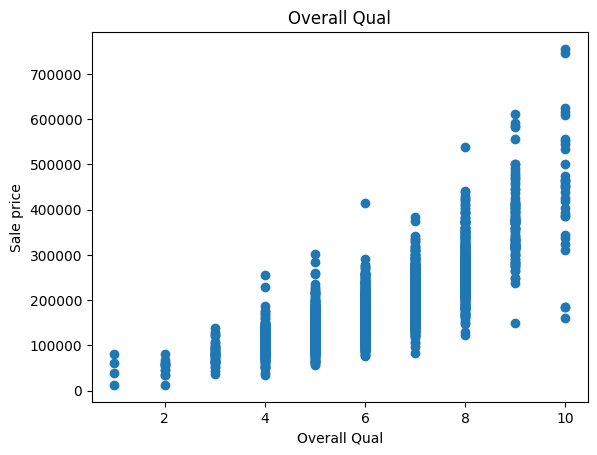

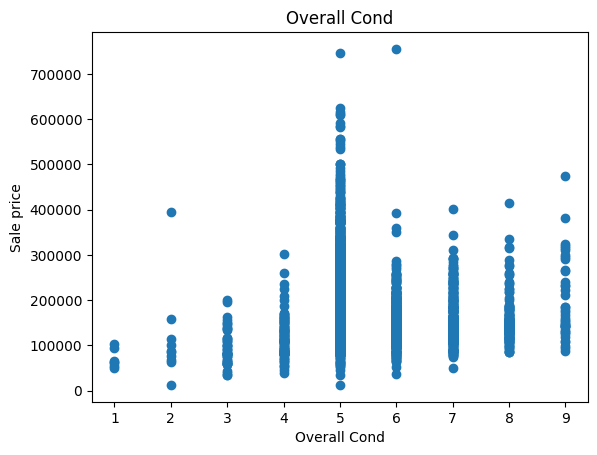

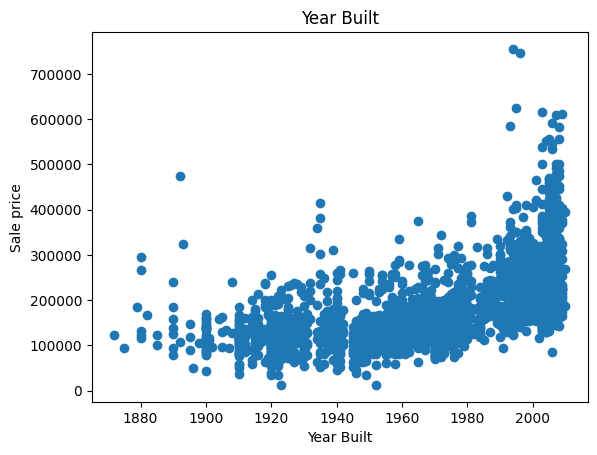

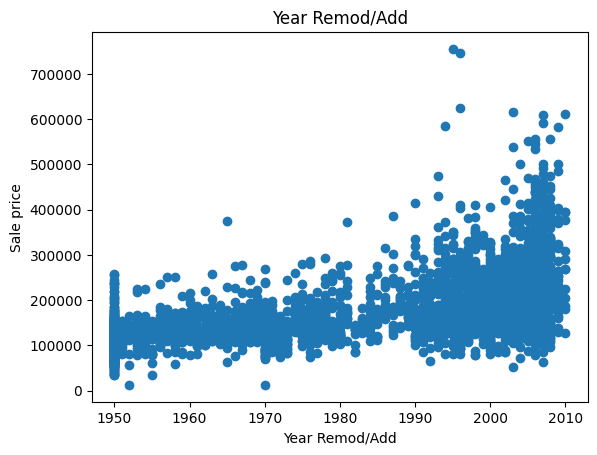

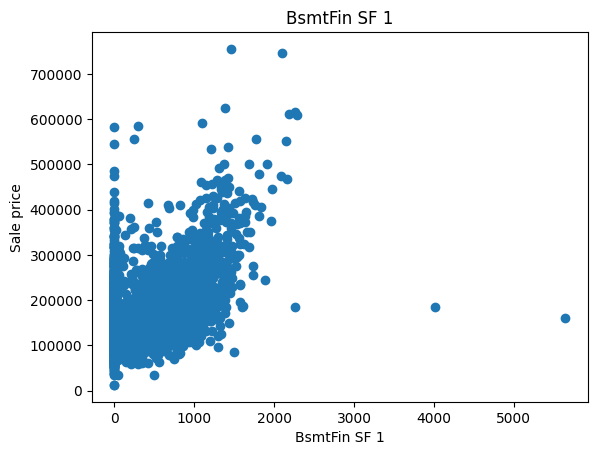

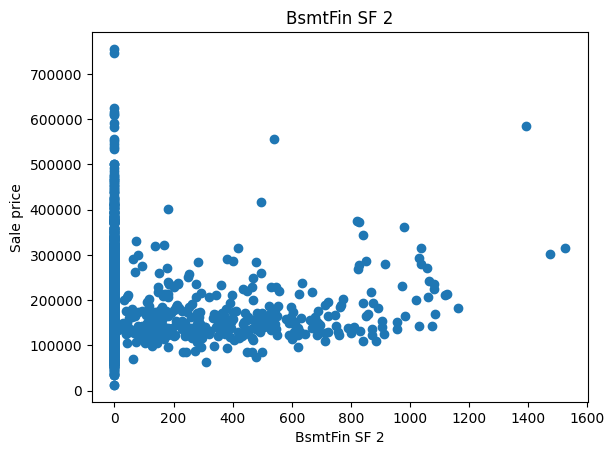

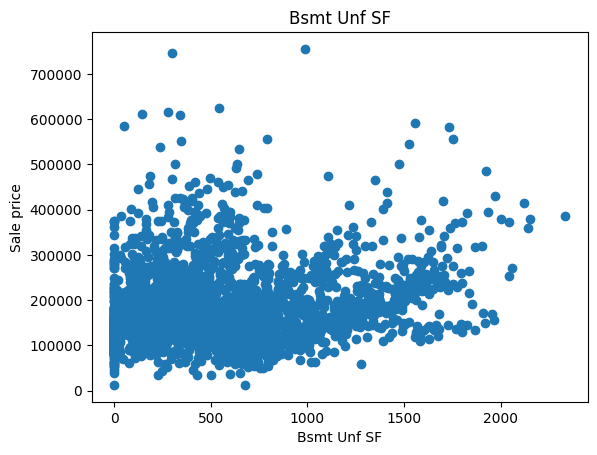

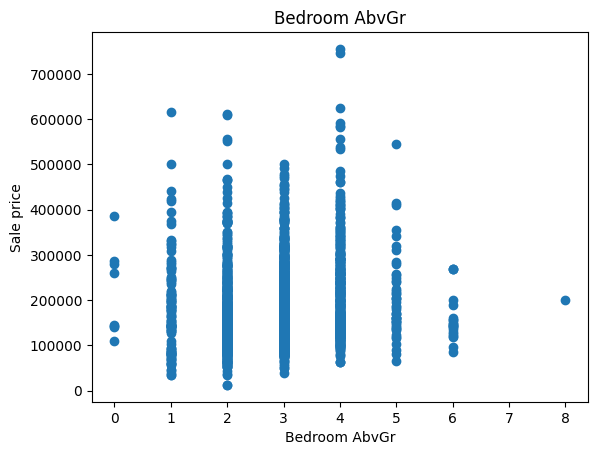

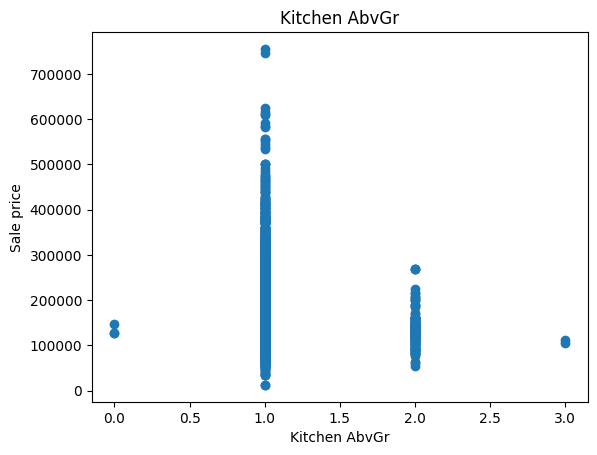

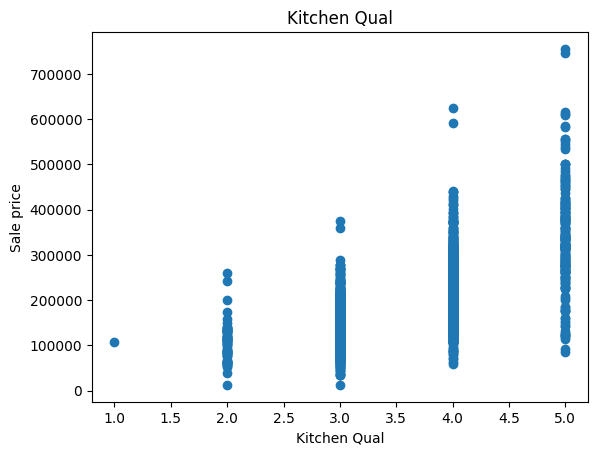

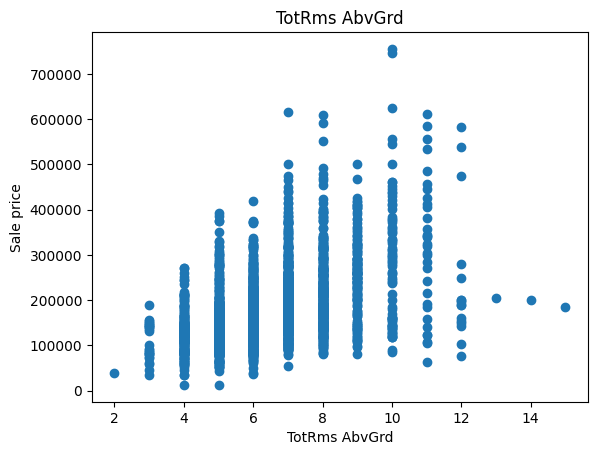

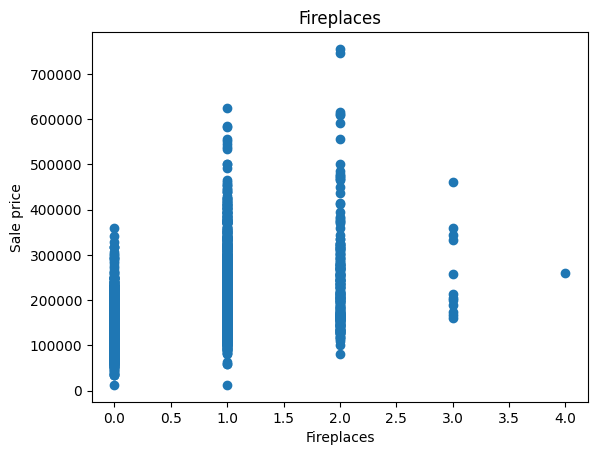

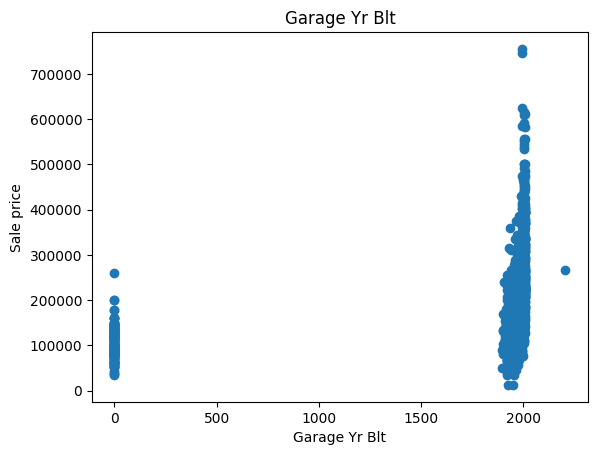

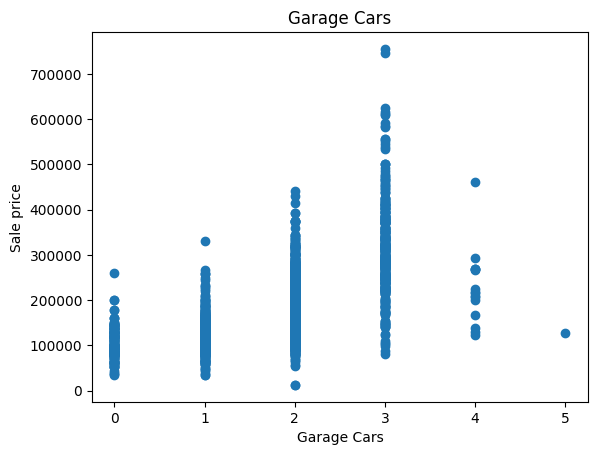

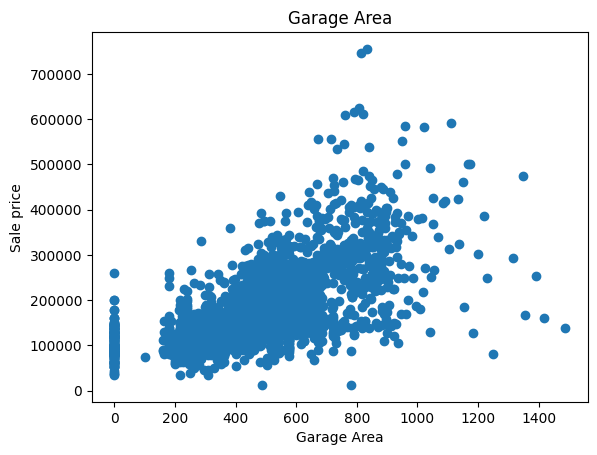

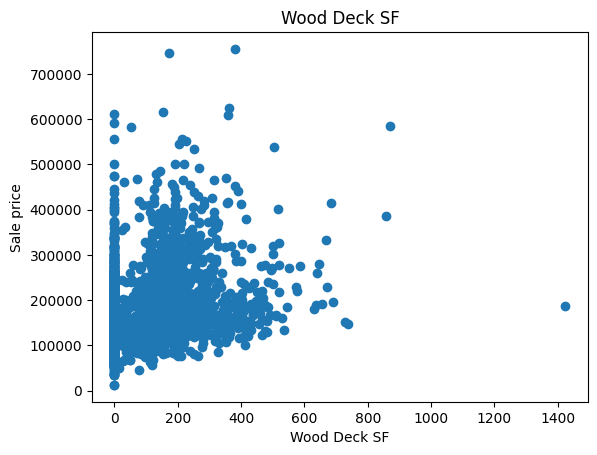

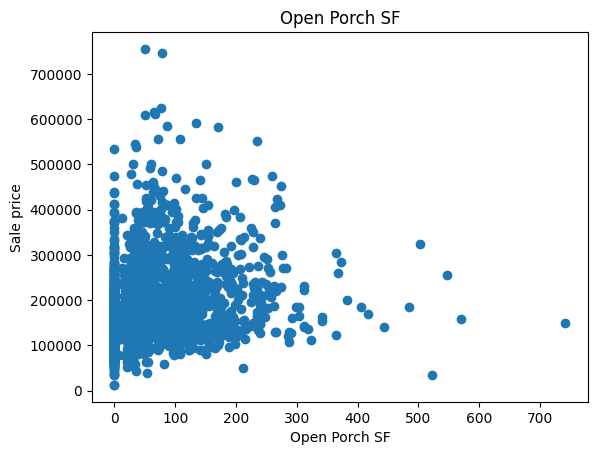

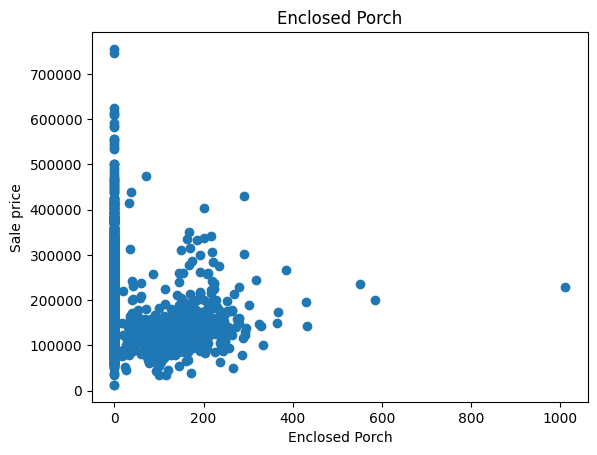

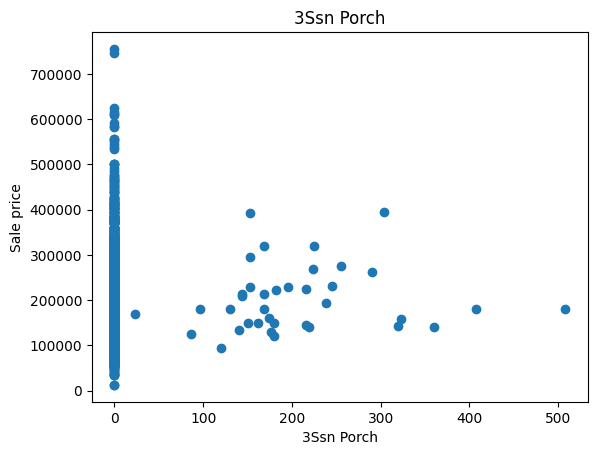

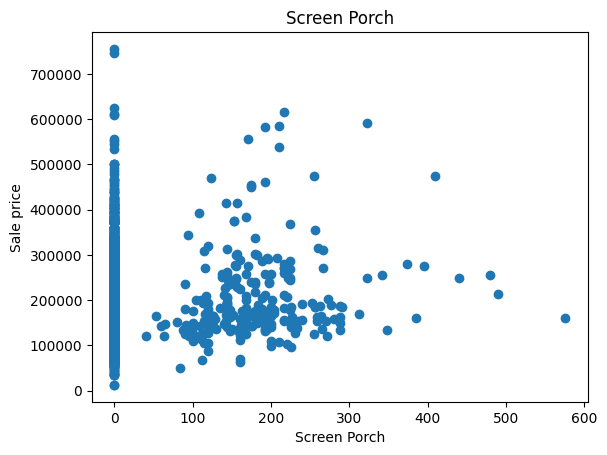

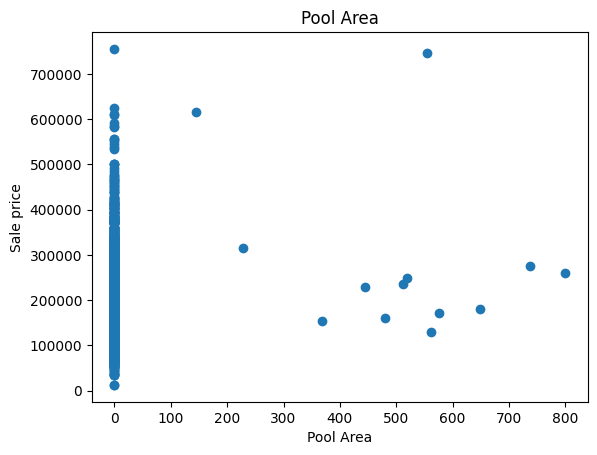

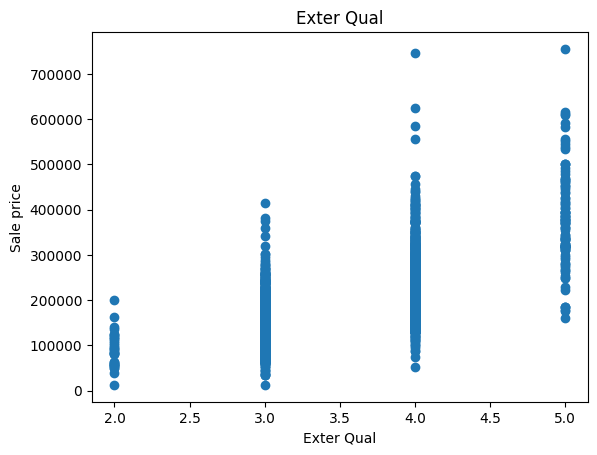

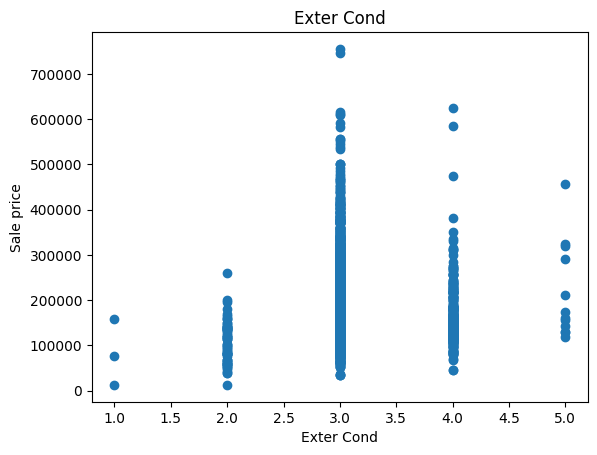

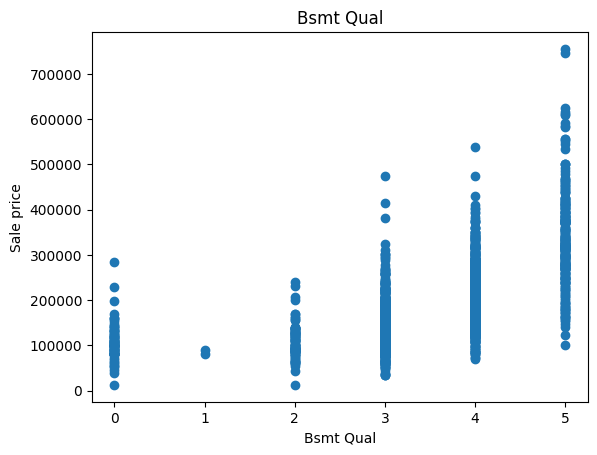

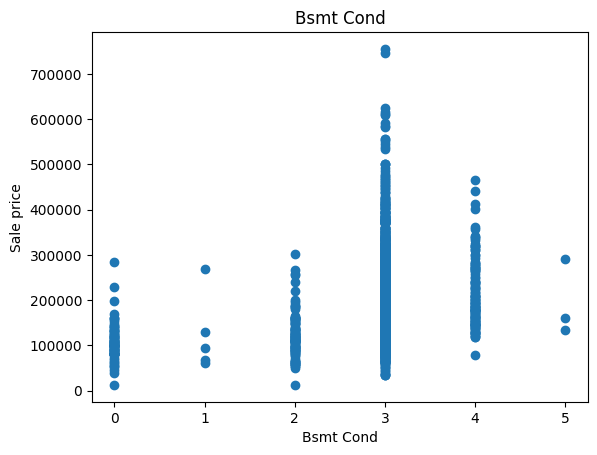

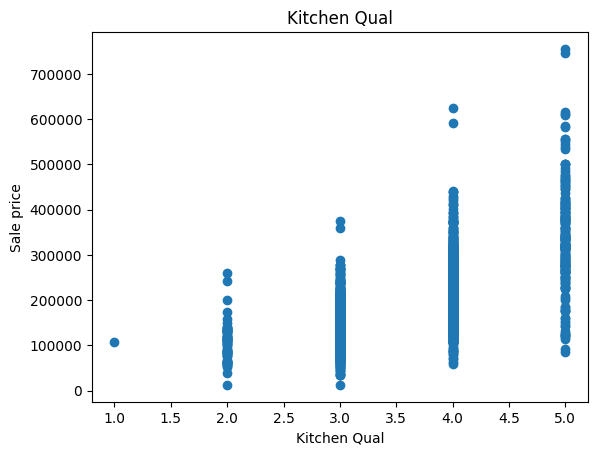

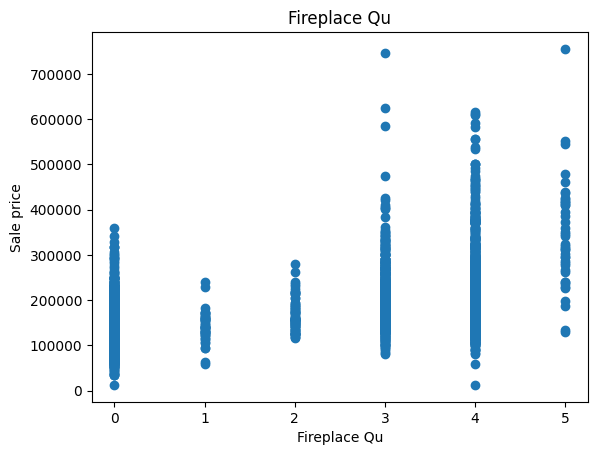

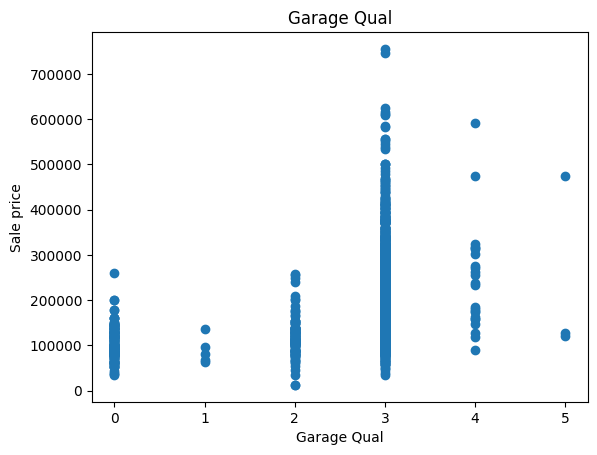

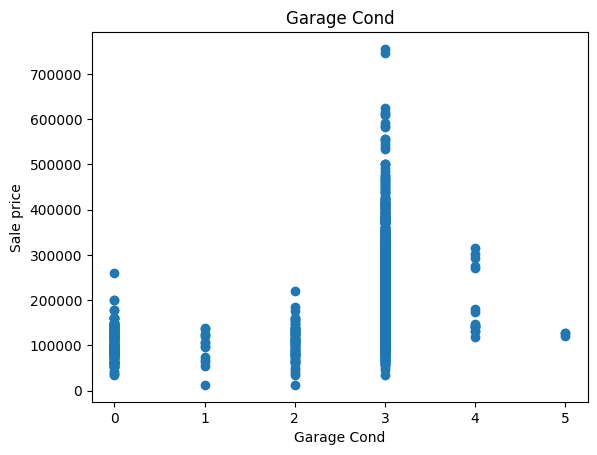

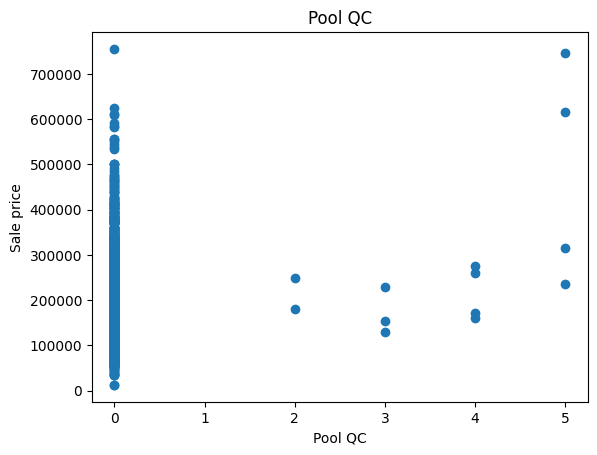

In [37]:
# Lets do some plots of all these numbers we have now!
numerical_columns = keep_list + ordinal_encode_list

for column in numerical_columns:
    plt.scatter(df2[column],df['SalePrice'])
    plt.title(column)
    plt.ylabel('Sale price')
    plt.xlabel(column)
    plt.show()

# The plots look relatively linear for the most part.

### One-hot encode

In [4]:
# Let's one-hot encode the relevant columns using the get_dummies function
df3 = df2.copy()

for column in one_hot_encode_list:
    one_hot_encoded = pd.get_dummies(df3[column], prefix=column, dtype=int)
    df3 = pd.concat([df3 , one_hot_encoded], axis=1)
    df3.drop(column, axis=1, inplace=True)

# I want to combine sell month and sell year: Mo Sold & Yr Sold
df3['Sold Time'] = df3['Yr Sold']*12+df3['Mo Sold']
df3 = df3.drop(columns = ['Yr Sold', 'Mo Sold'])
if 'Sold Time' not in keep_list: keep_list.append('Sold Time')
if 'Sold Time' not in numerical_columns: numerical_columns.append('Sold Time')
df3.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,...,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Sold Time
0,141.0,31770,6,5,1960,1960,3,3,3,4,...,0,0,1,0,0,0,0,0,1,24125
1,80.0,11622,5,6,1961,1961,3,3,3,3,...,0,0,1,0,0,0,0,0,1,24126
2,81.0,14267,6,6,1958,1958,3,3,3,3,...,0,0,1,0,0,0,0,0,1,24126
3,93.0,11160,7,5,1968,1968,4,3,3,3,...,0,0,1,0,0,0,0,0,1,24124
4,74.0,13830,5,5,1997,1998,3,3,4,3,...,0,0,0,1,0,0,0,0,1,24123


In [5]:
### Normalize & feature scale.

# Lets scale and normalize the features.
def norm_n_scale(df_in, columns):
    means = df_in[columns].mean()
    stds = df_in[columns].std()
    scaled_df = df_in[columns].copy()
    test_index = 5
    
    for index,column in enumerate(columns):
        scaled_df[column] = df_in[column].values - means.iloc[index]
        scaled_df[column] = scaled_df[column].values / stds.iloc[index]
        
    return scaled_df

### Polynomial

# I want to try multiple degrees of the polynomial parameters. So let's make a function
def polynomial(dataframe, columns, degree):
    df_poly = pd.DataFrame()
    for column in columns:
        for i in range(2, degree + 1):
            df_poly[f"{column}^{i}"] = dataframe[column] ** i
    new_df = pd.concat([dataframe, df_poly], axis=1)
    return new_df


### Split into train, val, test
from sklearn.model_selection import train_test_split

def split_dataframe(dataframe):
    df_train,df_temp = train_test_split(dataframe, test_size=0.4, random_state=42)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)
    
    return df_train,df_val, df_test


### Cost function + Regularization

# The cost function is the sum of all the squared losses (predicted y - true y) divided by 2 times the amount of training examples.
def calculate_cost_LR(X, t, labels,lambda_=0):
    predictions = np.dot(X,t)
    mse = np.sum((predictions - labels)**2)/labels.shape[0]
    regularization = (lambda_ / (2 * labels.shape[0])) * np.sum(t[1:]**2)
    cost =  mse + regularization
    
    return cost


### Gradient Descent

# Performs gradient descent to update the theta parameters
# X: Input features
# theta: Current model parameters
# y: True output values
# alpha_: Learning rate
# lambda_: Regularization strength
def gradient_descent(X, theta, y, alpha_, lambda_=0):
    m = y.shape[0]  # Number of training examples
    
    predictions = np.dot(X, theta)
    
    # This is the gradient for the bias term (without regularization)
    bias_grad = np.sum(predictions - y) / m
    
    # This is the gradient for the feature weights (with regularization)
    feature_grads = np.dot((predictions - y), X) / m
    feature_grads[1:] += (lambda_ / m) * theta[1:]
    
    # Update the parameters
    theta[0] -= alpha_ * bias_grad  # Update the bias term
    theta[1:] -= alpha_ * feature_grads[1:]  # Update the feature weights
    
    return theta



df4 = df3.copy()
df4[keep_list] = norm_n_scale(df3[keep_list], keep_list)

df4.head()


ones_col = pd.DataFrame(np.ones(len(df4), dtype=int), columns=['Bias'])
df5 = pd.concat([ones_col, df4.copy()], axis=1)
print(df5.shape[1])
df5.head()

149


,Bias,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,...,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Sold Time
0,1,2.488167,2.743912,-0.067242,-0.506632,-0.375473,-1.163290,3,3,3,...,0,0,1,0,0,0,0,0,1,1.620757
1,1,0.667242,0.187065,-0.775946,0.393024,-0.342410,-1.115352,3,3,3,...,0,0,1,0,0,0,0,0,1,1.684822
2,1,0.697093,0.522724,-0.067242,0.393024,-0.441599,-1.259166,3,3,3,...,0,0,1,0,0,0,0,0,1,1.684822
3,1,1.055308,0.128436,0.641462,-0.506632,-0.110970,-0.779786,4,3,3,...,0,0,1,0,0,0,0,0,1,1.556692
4,1,0.488134,0.467268,-0.775946,-0.506632,0.847855,0.658354,3,3,4,...,0,0,0,1,0,0,0,0,1,1.492627


In [6]:
polynomials = [1,2,3,4,5]
lambda_ = [0,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01]
alpha_ = [1e-07,1e-08,1e-09,1e-10,1e-11,1e-12,1e-13,1e-14]
iterations = 100
train_cost_history = {}
val_cost_history = {}
best_theta = []
lowest_cost = 100000000000000000

# Combine the target variable (SalePrice) with the features
df6 = np.hstack((df[y_label].values.reshape(-1,1), df5.copy()))

all_column_names = list(df5.columns)

# Split the data into train, validation, and test sets
train, val, test = split_dataframe(df6)

# Create separate dataframes for the y labels
y_train = train[:, 0]
y_val = val[:, 0]
y_test = test[:, 0]

# Remove the y label from the features dataframes
train_df = pd.DataFrame(train[:, 1:], columns=all_column_names)
val_df = pd.DataFrame(val[:, 1:], columns=all_column_names)
test_df = pd.DataFrame(test[:, 1:], columns=all_column_names)

# Perform grid search to find the best hyperparameters
for p in polynomials:
    if p == 1:
        train_poly = train_df
        val_poly = val_df
    if p >= 2:
        train_poly = polynomial(train_df,keep_list,p)
        val_poly = polynomial(val_df,keep_list,p)
    for l in lambda_:
        for a in alpha_:
            theta = (np.ones(train_poly.shape[1]))
            for i in range(iterations):
                gradient_descent(train_poly, theta, y_train, a, l)
            print("")
            train_cost_history[f"{p}, {l}, {a}"] = calculate_cost_LR(train_poly, theta, y_train,l)
            print(str(calculate_cost_LR(train_poly, theta, y_train,l)))
            val_cost_history[f"{p}, {l}, {a}"] = calculate_cost_LR(val_poly, theta, y_val,l)
            print(str(calculate_cost_LR(val_poly, theta, y_val,l)))
            if val_cost_history[f"{p}, {l}, {a}"] < lowest_cost:
                best_theta = theta
                print(" best: ")
                lowest_cost = val_cost_history[f"{p}, {l}, {a}"]
            
            print(f"poly: {p}, lambda: {l}, alpha: {a} has been completed.")


2597351797.5182943
3322680602.7049093
 best: 
poly: 1, lambda: 0, alpha: 1e-07 has been completed.

2646997547.253761
3383668651.496784
poly: 1, lambda: 0, alpha: 1e-08 has been completed.

17984843253.81833
19387043242.593502
poly: 1, lambda: 0, alpha: 1e-09 has been completed.

34323115327.85143
36254991303.416306
poly: 1, lambda: 0, alpha: 1e-10 has been completed.

36701069823.445076
38706872530.74766
poly: 1, lambda: 0, alpha: 1e-11 has been completed.

36948422731.95324
38961883240.8691
poly: 1, lambda: 0, alpha: 1e-12 has been completed.

36973256150.665726
38987485157.63713
poly: 1, lambda: 0, alpha: 1e-13 has been completed.

36975740476.419655
38990046360.44346
poly: 1, lambda: 0, alpha: 1e-14 has been completed.

2597351797.518296
3322680602.7049174
poly: 1, lambda: 1e-06, alpha: 1e-07 has been completed.

2646997547.2537637
3383668651.4967923
poly: 1, lambda: 1e-06, alpha: 1e-08 has been completed.

17984843253.81833
19387043242.593502
poly: 1, lambda: 1e-06, alpha: 1e-09 

C:\Users\CherryBerry\AppData\Local\Temp\ipykernel_2964\1980864556.py:62: RuntimeWarning: invalid value encountered in multiply
  feature_grads[1:] += (lambda_ / m) * theta[1:]



nan
nan
poly: 5, lambda: 0, alpha: 1e-07 has been completed.

nan
nan
poly: 5, lambda: 0, alpha: 1e-08 has been completed.


C:\Users\CherryBerry\AppData\Local\Temp\ipykernel_2964\1980864556.py:43: RuntimeWarning: overflow encountered in square
  mse = np.sum((predictions - labels)**2)/labels.shape[0]
C:\Users\CherryBerry\AppData\Local\Temp\ipykernel_2964\1980864556.py:44: RuntimeWarning: overflow encountered in square
  regularization = (lambda_ / (2 * labels.shape[0])) * np.sum(t[1:]**2)
C:\Users\CherryBerry\AppData\Local\Temp\ipykernel_2964\1980864556.py:44: RuntimeWarning: invalid value encountered in scalar multiply
  regularization = (lambda_ / (2 * labels.shape[0])) * np.sum(t[1:]**2)



nan
nan
poly: 5, lambda: 0, alpha: 1e-09 has been completed.

7.558895441508059e+190
2.562172736026824e+188
poly: 5, lambda: 0, alpha: 1e-10 has been completed.

36106341114.186485
38232769709.98598
poly: 5, lambda: 0, alpha: 1e-11 has been completed.

38140379400.45556
38936467269.82484
poly: 5, lambda: 0, alpha: 1e-12 has been completed.

72069063659.72353
43969246464.82106
poly: 5, lambda: 0, alpha: 1e-13 has been completed.

142812026930.90494
46689390273.960815
poly: 5, lambda: 0, alpha: 1e-14 has been completed.

nan
nan
poly: 5, lambda: 1e-06, alpha: 1e-07 has been completed.

inf
inf
poly: 5, lambda: 1e-06, alpha: 1e-08 has been completed.

inf
inf
poly: 5, lambda: 1e-06, alpha: 1e-09 has been completed.

7.558895441508059e+190
2.562172736026824e+188
poly: 5, lambda: 1e-06, alpha: 1e-10 has been completed.

36106341114.186485
38232769709.98598
poly: 5, lambda: 1e-06, alpha: 1e-11 has been completed.

38140379400.45556
38936467269.82484
poly: 5, lambda: 1e-06, alpha: 1e-12 has 

### Choose best val, and test the model

In [21]:
# Sort the train and validation cost histories to find the best ones
list_train_cost_history = sorted(train_cost_history.items(), key=lambda x: x[1])
list_val_cost_history = sorted(val_cost_history.items(), key=lambda x: x[1])

top_train = list_train_cost_history[0]
top_val = list_val_cost_history[0]

print("Best train cost scores: " + str(top_train))
print("")
print("Best validation cost scores: " + str(top_val))

Best train cost scores: ('3, 0, 1e-07', 2581965044.111442)

Best validation cost scores: ('3, 0, 1e-07', 3306899139.667755)


In [12]:
# Run gradient descent with the best hyperparameters
polynomials = [3]
lambda_ = [0]
alpha_ = [1e-07]
iterations = 10000

for p in polynomials:
    if p == 1:
        test_poly = test_df
        theta = (np.ones(test_poly.shape[1]))*0.01
    if p >= 2:
        test_poly = polynomial(test_df,keep_list,p)
        theta = (np.ones(test_poly.shape[1]))*0.01
    for l in lambda_:
        for a in alpha_:
            for i in range(iterations):
                gradient_descent(test_poly, theta, y_test, a, l)
            print(calculate_cost_LR(test_poly, theta, y_test,l))
            best_theta = theta

2240073721.8157024


In [13]:
# Create a DataFrame to compare predictions with true values
predictions = np.dot(test_poly,best_theta)

compare = pd.DataFrame()
compare['Sale Price'] = y_test
compare['Prediction'] = predictions
compare['Difference'] = compare['Sale Price'] - compare['Prediction']

compare.head()

,Sale Price,Prediction,Difference
0,195000.0,220938.261521,-25938.261521
1,100000.0,166990.617281,-66990.617281
2,119000.0,163990.788389,-44990.788389
3,185000.0,170006.780878,14993.219122
4,138000.0,219256.792703,-81256.792703


In [20]:
# Calculate and print evaluation metrics
mean_price = sum(y_test)/len(y_test)

print("Average house price:")
print(mean_price)

mean_error = sum((compare['Difference']**2)**(0.5))/len(compare)
print("Average error:")
print(mean_error)

print("Average difference:")
print(str(round(mean_error/mean_price*100))+"%")

Average house price:
183920.11262798635
Average error:
33346.469704233314
Average difference:
18%
